<a href="https://colab.research.google.com/github/nitya25/Text-Classification-NBC/blob/main/DM_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings

# ignore all warnings
warnings.filterwarnings("ignore")

# ignore a specific warning
warnings.filterwarnings("ignore", category=DeprecationWarning)

# generate a warning
warnings.warn("This is a warning", DeprecationWarning)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/rt_reviews.csv', encoding='latin-1')
print(df.shape)
df.head()

(480000, 2)


,Freshness,Review
0,fresh,"Manakamana doesn't answer any questions, yet ..."
1,fresh,Wilfully offensive and powered by a chest-thu...
2,rotten,It would be difficult to imagine material mor...
3,rotten,Despite the gusto its star brings to the role...
4,rotten,If there was a good idea at the core of this ...


In [ ]:
from sklearn.model_selection import train_test_split

# Divide the dataset into train and test sets
train_data, test_data = train_test_split(df, test_size=0.3, random_state=42)

# Divide the test set into dev and test sets
dev_data, test_data = train_test_split(test_data, test_size=0.5, random_state=42)

# Print the number of examples in each set
print(f"train set:{train_data.shape}")
print(f"dev set:{dev_data.shape}")
print(f"test set:{test_data.shape}")


train set:(336000, 2)
dev set:(72000, 2)
test set:(72000, 2)


In [ ]:
from collections import Counter
import numpy as np

# Tokenize the text
train_tokens = [review.lower().split() for review in train_data['Review']]

# Count the frequency of each word in the training set
word_counts = Counter([word for review in train_tokens for word in review])

# Create a list of words that occur more than 5 times in the training set
vocab_list = [word for word, count in word_counts.items() if count > 5]

# Create a reverse index that maps each word to its index in the vocabulary
vocab_index = {word: i for i, word in enumerate(vocab_list)}

# Print the size of the vocabulary
print(f"Size of vocabulary: {len(vocab_list)}")


Size of vocabulary: 51275


In [ ]:
vocab_list

['does',
 'one',
 'really',
 'have',
 'to',
 'so',
 "christ's",
 'story',
 'in',
 'order',
 'make',
 'it',
 'relevant',
 "today's",
 'audiences?',
 'people',
 'richer',
 'than',
 'you',
 'get',
 'paid',
 'come',
 'up',
 'with',
 'this',
 'stuff.',
 'while',
 "doesn't",
 'exactly',
 'take',
 'your',
 'breath',
 'away,',
 'small',
 'coming-of-age',
 'will',
 'smile',
 'about',
 'how',
 'film',
 'can',
 'even',
 'the',
 'slightest',
 'of',
 'ideas.',
 'bad',
 'movie,',
 'folks.',
 "don't",
 'be',
 'a',
 'fool',
 'and',
 'waste',
 'time',
 'money',
 'on',
 'it.',
 '(full',
 'content',
 'review',
 'for',
 'parents',
 '-',
 'sex,',
 'profanity,',
 'nudity,',
 'etc.',
 'also',
 'available)',
 'all',
 'hat,',
 'no',
 'tentacles.',
 'last',
 'flag',
 'flying',
 'lacks',
 'casual,',
 'lived-in',
 'realism',
 'usually',
 'find',
 'linklater',
 'film.',
 'buy',
 'men',
 'as',
 'pals,',
 'premise',
 'connection',
 'that',
 'caused',
 'doc',
 'seek',
 'out',
 'these',
 'is',
 'not',
 'visible',
 'sc

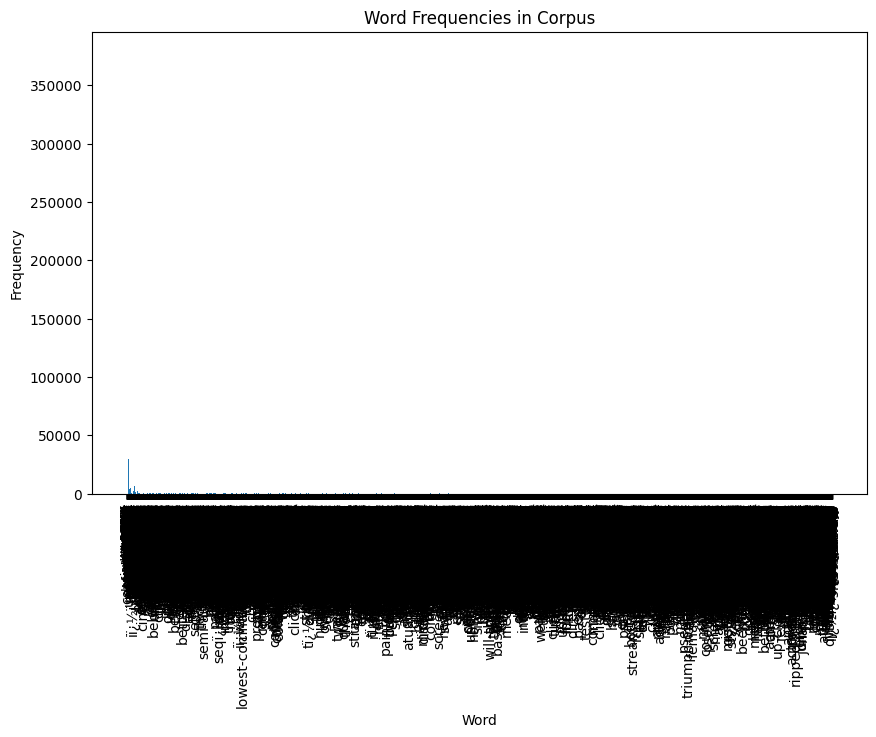

In [14]:
import matplotlib.pyplot as plt

# Bar chart of word frequencies
plt.figure(figsize=(10,6))
plt.bar(vocab_list, [word_counts[token] for token in vocab_list])
plt.title("Word Frequencies in Corpus")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()

In [29]:
# Probability of the occurrence
total_docs = len(train_data)
docs_with_the = sum(['the' in review for review in train_data['Review']])
p_the = docs_with_the / total_docs
print(f"probabilty of 'the' occurence: {p_the}")

# Conditional probability based on the sentiment
total_positive_docs = len(train_data[train_data['Freshness'] == 'fresh'])
positive_docs_with_the = sum(['the' in review for review in train_data[train_data['Freshness'] == 'fresh']['Review']])
p_the_given_positive = positive_docs_with_the / total_positive_docs
print(f"conditional probability of 'the' given positive sentiment: {p_the_given_positive}")

total_negative_docs = len(train_data[train_data['Freshness'] == 'rotten'])
negative_docs_with_the = sum(['the' in review for review in train_data[train_data['Freshness'] == 'rotten']['Review']])
p_the_given_negative = negative_docs_with_the / total_negative_docs
print(f"conditional probability of 'the' given negative sentiment: {p_the_given_negative}")

probabilty of 'the' occurence: 0.6529285714285714
conditional probability of 'the' given positive sentiment: 0.653702612453349
conditional probability of 'the' given negative sentiment: 0.6521545027589778


In [31]:
# Calculate the probability of occurrence of each word in the training set
word_probs = np.zeros(len(vocab_list))
total_docs = len(train_data)
for review in train_tokens:
    for word in review:
        if word in vocab_list:
            word_probs[vocab_index[word]] += 1
word_probs /= total_docs
print(f"Probability of occurrence of each word : {word_probs}")

# Calculate the conditional probability of each word given the sentiment
positive_docs = train_data[train_data['Freshness'] == 'fresh']
negative_docs = train_data[train_data['Freshness'] == 'rotten']

pos_word_counts = np.zeros(len(vocab_list))
neg_word_counts = np.zeros(len(vocab_list))

for review in positive_docs['Review']:
    for word in review.lower().split():
        if word in vocab_list:
            pos_word_counts[vocab_index[word]] += 1

for review in negative_docs['Review']:
    for word in review.lower().split():
        if word in vocab_list:
            neg_word_counts[vocab_index[word]] += 1

pos_probs = (pos_word_counts + 1) / (len(positive_docs) + 2)
neg_probs = (neg_word_counts + 1) / (len(negative_docs) + 2)
print(f"conditional probability of each word given positive : {pos_probs}")
print(f"conditional probability of each word given negative : {neg_probs}")



Probability of occurrence of each word : [2.05208333e-02 6.92470238e-02 1.90178571e-02 ... 2.08333333e-05
 1.78571429e-05 2.38095238e-05]
conditional probability of each word given positive : [2.18505402e-02 7.67893813e-02 1.52138329e-02 ... 3.57132228e-05
 1.19044076e-05 2.97610190e-05]
conditional probability of each word given negative : [1.92024953e-02 6.17146531e-02 2.28334692e-02 ... 1.78572492e-05
 3.57144983e-05 2.97620819e-05]


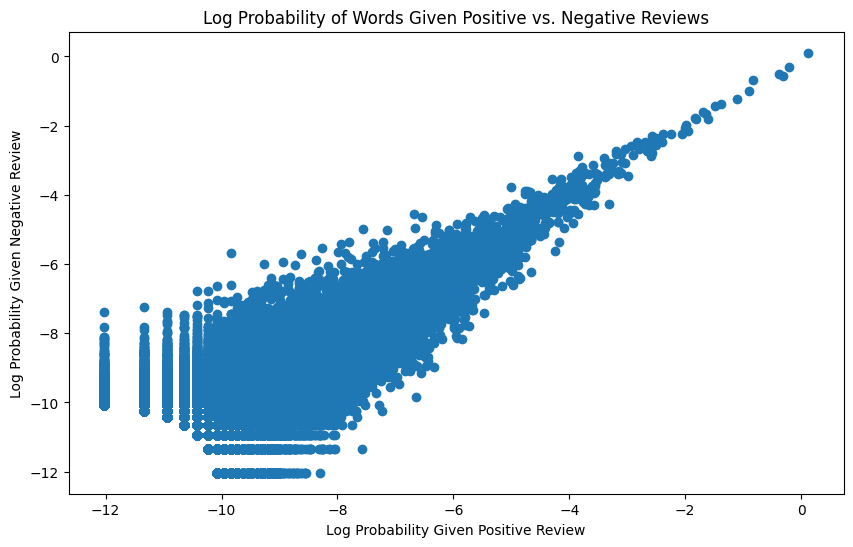

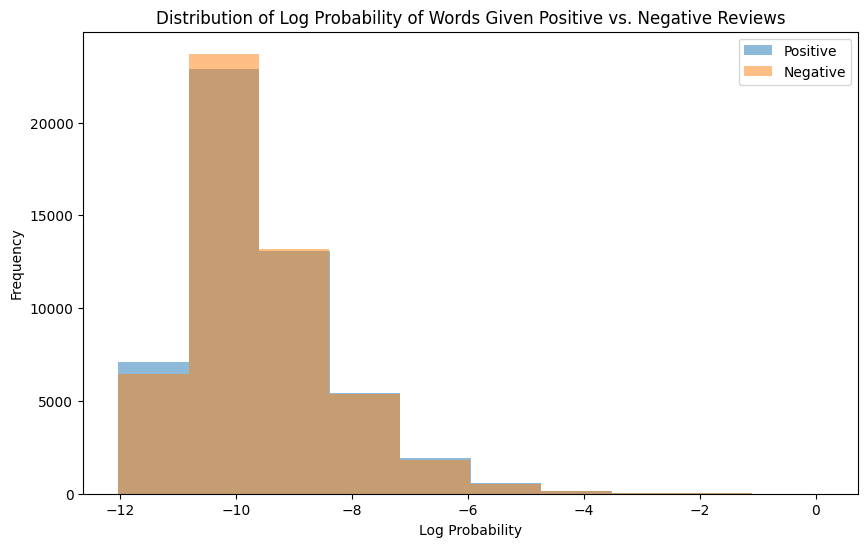

In [15]:
# Scatter plot of log probabilities
plt.figure(figsize=(10,6))
plt.scatter(np.log(pos_probs), np.log(neg_probs))
plt.title("Log Probability of Words Given Positive vs. Negative Reviews")
plt.xlabel("Log Probability Given Positive Review")
plt.ylabel("Log Probability Given Negative Review")
plt.show()

# Histogram of log probabilities
plt.figure(figsize=(10,6))
plt.hist(np.log(pos_probs), alpha=0.5, label='Positive')
plt.hist(np.log(neg_probs), alpha=0.5, label='Negative')
plt.title("Distribution of Log Probability of Words Given Positive vs. Negative Reviews")
plt.xlabel("Log Probability")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [ ]:
def predict_sentiment(review):
    # Tokenize the review
    tokens = review.lower().split()
    
    # Calculate the log probabilities of each class given the review
    pos_prob = np.log(0.5) + np.sum(np.log(pos_probs[vocab_index[token]] if token in vocab_list else 1) for token in tokens)
    neg_prob = np.log(0.5) + np.sum(np.log(neg_probs[vocab_index[token]] if token in vocab_list else 1) for token in tokens)
    
    # Return the class with the highest probability
    return 'fresh' if pos_prob > neg_prob else 'rotten'

# Predict the sentiment of each review in the development set
dev_preds = [predict_sentiment(review) for review in dev_data['Review']]

# Calculate the accuracy of the model
accuracy = np.sum(dev_preds == dev_data['Freshness']) / len(dev_data)
print(f"Accuracy on dev set: {accuracy:.3f}")


Accuracy on dev set: 0.797


Smoothing parameter: 0.0000, Accuracy on dev set: 0.796
Smoothing parameter: 0.1000, Accuracy on dev set: 0.588
Smoothing parameter: 0.0100, Accuracy on dev set: 0.671
Smoothing parameter: 0.0010, Accuracy on dev set: 0.743
Smoothing parameter: 0.0001, Accuracy on dev set: 0.780


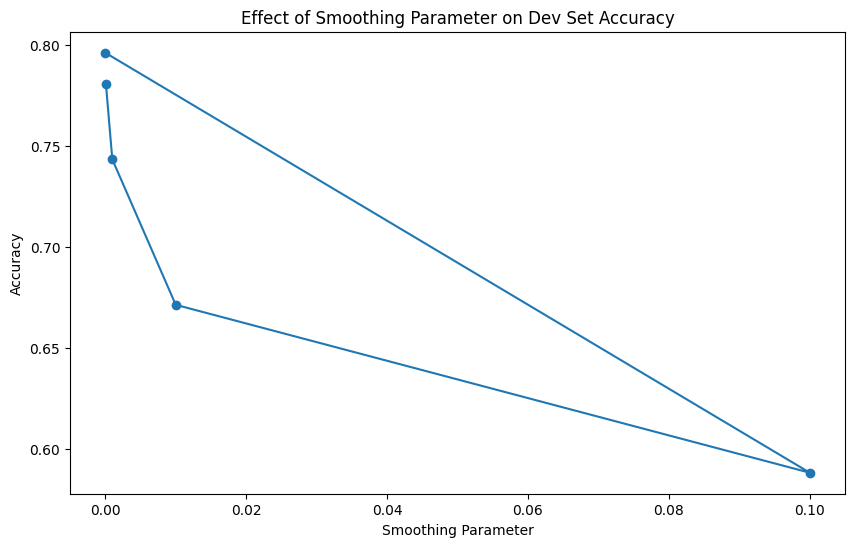

In [19]:
def predict_sentiment(review, alpha):
    # Tokenize the review
    tokens = review.lower().split()
    
    # Calculate the log probabilities of each class given the review
    pos_prob = np.log(0.5) + np.sum(np.log((pos_probs[vocab_index.get(token, 0)]*(1-alpha)) + alpha) for token in tokens)
    neg_prob = np.log(0.5) + np.sum(np.log((neg_probs[vocab_index.get(token, 0)]*(1-alpha)) + alpha) for token in tokens)

    
    # Return the class with the highest probability
    return 'fresh' if pos_prob > neg_prob else 'rotten'


# Test the effect of different smoothing parameters
alphas = [0, 0.1, 0.01, 0.001, 0.0001]
dev_accuracy = []
for alpha in alphas:
    dev_preds = [predict_sentiment(review, alpha=alpha) for review in dev_data['Review']]
    accuracy = np.sum(dev_preds == dev_data['Freshness']) / len(dev_data)
    print(f"Smoothing parameter: {alpha:.4f}, Accuracy on dev set: {accuracy:.3f}")
    dev_accuracy.append(accuracy)
# Create a line chart of the accuracy with different smoothing parameters
plt.figure(figsize=(10,6))
plt.plot(alphas, dev_accuracy, marker='o')

# Add a title and axis labels to the chart
plt.title("Effect of Smoothing Parameter on Dev Set Accuracy")
plt.xlabel("Smoothing Parameter")
plt.ylabel("Accuracy")

# Show the chart
plt.show()


In [ ]:
# Calculate the difference in conditional probability between the two classes for each word
diff_probs = pos_probs - neg_probs
top_pos_words = [vocab_list[i] for i in np.argsort(diff_probs)[-10:][::-1]]
top_neg_words = [vocab_list[i] for i in np.argsort(diff_probs)[:10]]

print("Top 10 words that predict a positive review:")
print(top_pos_words)

print("Top 10 words that predict a negative review:")
print(top_neg_words)


Top 10 words that predict a positive review:
['and', 'of', 'a', 'is', 'with', 'in', 'an', 'film', 'best', 'the']
Top 10 words that predict a negative review:
['to', 'too', 'like', 'or', 'movie', 'have', 'so', 'much', 'just', 'only']


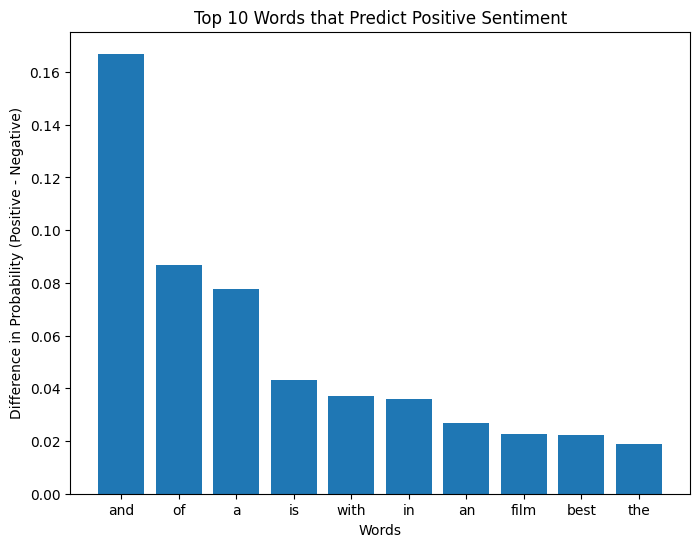

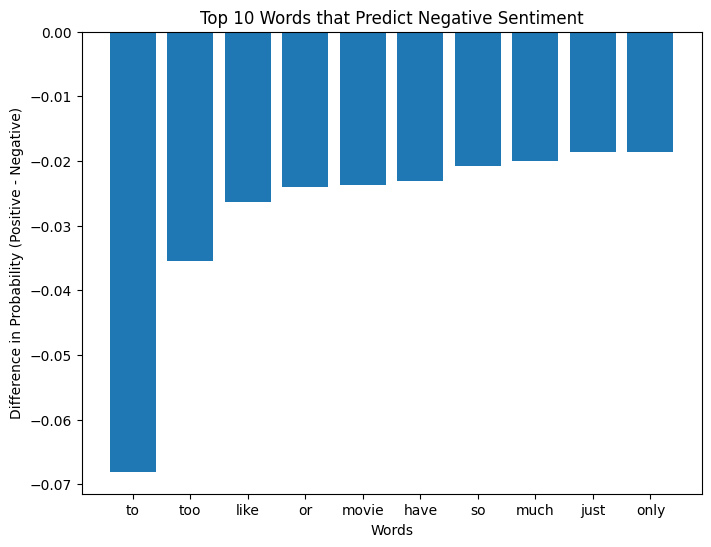

In [13]:
import matplotlib.pyplot as plt

diff_probs = pos_probs - neg_probs
top_pos_words = [vocab_list[i] for i in np.argsort(diff_probs)[-10:][::-1]]
top_neg_words = [vocab_list[i] for i in np.argsort(diff_probs)[:10]]

# Bar plot of top positive words
plt.figure(figsize=(8,6))
plt.bar(top_pos_words, diff_probs[[vocab_index[token] for token in top_pos_words]])
plt.title('Top 10 Words that Predict Positive Sentiment')
plt.xlabel('Words')
plt.ylabel('Difference in Probability (Positive - Negative)')
plt.show()

# Bar plot of top negative words
plt.figure(figsize=(8,6))
plt.bar(top_neg_words, diff_probs[[vocab_index[token] for token in top_neg_words]])
plt.title('Top 10 Words that Predict Negative Sentiment')
plt.xlabel('Words')
plt.ylabel('Difference in Probability (Positive - Negative)')
plt.show()


In [26]:
alphas = [0, 0.1, 0.01, 0.001, 0.0001]
test_acc=[]
for alpha in alphas:
  test_preds = [predict_sentiment(review, alpha=alpha) for review in test_data['Review']]
  test_accuracy = np.sum(test_preds == test_data['Freshness']) / len(test_data)
  print(f" Smoothing parameter: {alpha:.4f}, Accuracy on test set: {test_accuracy:.3f}")
  test_acc.append(test_accuracy)

 Smoothing parameter: 0.0000, Accuracy on test set: 0.795
 Smoothing parameter: 0.1000, Accuracy on test set: 0.589
 Smoothing parameter: 0.0100, Accuracy on test set: 0.672
 Smoothing parameter: 0.0010, Accuracy on test set: 0.743
 Smoothing parameter: 0.0001, Accuracy on test set: 0.781


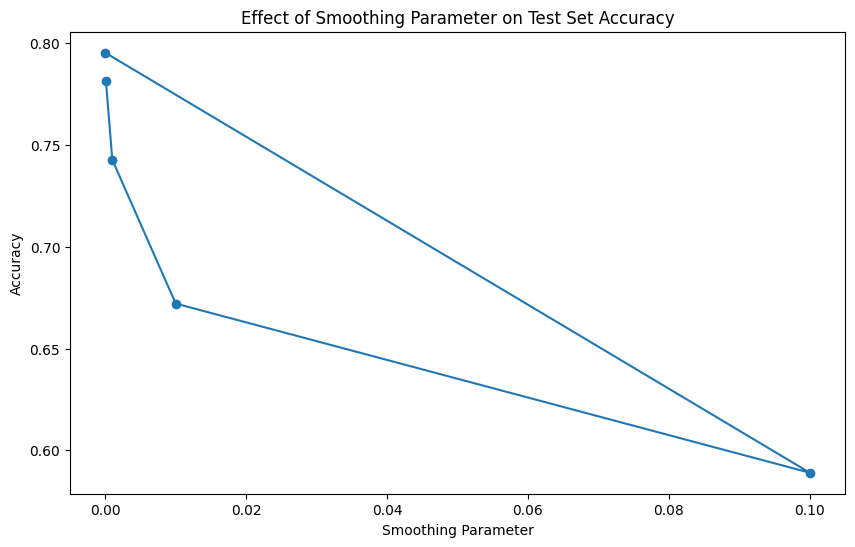

In [27]:
# Create a line chart of the accuracy with different smoothing parameters
plt.figure(figsize=(10,6))
plt.plot(alphas, test_acc, marker='o')

# Add a title and axis labels to the chart
plt.title("Effect of Smoothing Parameter on Test Set Accuracy")
plt.xlabel("Smoothing Parameter")
plt.ylabel("Accuracy")

# Show the chart
plt.show()

In [28]:
alphas = [0, 0.1, 0.01, 0.001, 0.0001]
for alpha in alphas:
  test_preds = [predict_sentiment(review, alpha=alpha) for review in test_data['Review']]
test_accuracy = np.sum(test_preds == test_data['Freshness']) / len(test_data)
print(f"Final accuracy on test set: {test_accuracy:.3f}")

Final accuracy on test set: 0.781
